In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
truck = pd.read_csv("cars_trucks_and_buses_per_1000_persons.csv")
truck.head()

,geo,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0


In [3]:
# reading the dataset
co2 = pd.read_csv("co2_emissions_tonnes_per_person.csv")
co2.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [4]:
co2_emission = pd.concat([co2.pop(x) for x in ['geo', '2014']], axis=1)
co2_emission.rename(columns = {'2014':'co2_emission'}, inplace = True)

In [5]:
co2_emission.head()

,geo,co2_emission
0,Afghanistan,0.299
1,Albania,1.960
2,Algeria,3.720
3,Andorra,5.830
4,Angola,1.290


In [6]:
# reading the dataset
coal = pd.read_csv("coal_consumption_per_cap.csv")
coal.head()

,geo,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.00554,0.00524,0.00389,0.0040,0.00495,0.0057,0.00154,0.0013,0.00146,...,0.02210,0.02170,0.01370,0.00858,0.00747,0.00777,0.00412,0.00458,0.00361,0.00356
1,Argentina,0.03570,0.03690,0.03560,0.0282,0.03710,0.0409,0.03310,0.0291,0.03010,...,0.03050,0.03450,0.02340,0.03080,0.03720,0.03110,0.02950,0.03460,0.03130,0.02410
2,Australia,1.53000,1.55000,1.55000,1.5500,1.57000,1.5500,1.53000,1.5700,1.61000,...,2.51000,2.57000,2.44000,2.23000,2.14000,1.98000,1.86000,1.82000,1.85000,1.82000
3,Austria,0.69600,0.66000,0.62100,0.6100,0.59700,0.6390,0.58300,0.5270,0.52200,...,0.47000,0.45000,0.34400,0.40200,0.41000,0.37900,0.38200,0.34700,0.37300,0.36400
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00014,0.00079,0.00046,0.00006,0.00038,0.00006,0.00031,0.00017,0.00004,0.00004


In [7]:
coal_consumption = pd.concat([coal.pop(x) for x in ['geo', '2014']], axis=1)
coal_consumption.rename(columns = {'2014':'coal_consumption'}, inplace = True)
coal_consumption.head()

,geo,coal_consumption
0,Algeria,0.00458
1,Argentina,0.03460
2,Australia,1.82000
3,Austria,0.34700
4,Azerbaijan,0.00017


In [8]:
# reading the dataset
elec = pd.read_csv("electricity_generation_per_person.csv")
elec.head()

,geo,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,544.0,559.0,532.0,568.0,607.0,621.0,653.0,673,699,...,1090,1150,1220,1270,1440,1530,1560,1640,1730,1730
1,Argentina,1490.0,1590.0,1660.0,1670.0,1580.0,1560.0,1620.0,1680,1810,...,2880,3190,3180,3210,3110,3230,3280,3290,3350,3350
2,Australia,7860.0,8100.0,8360.0,8670.0,9020.0,9130.0,9150.0,9230,9350,...,11600,11500,11500,11300,11400,11000,10800,10500,10600,10600
3,Austria,5850.0,5860.0,6610.0,6400.0,6530.0,6530.0,6620.0,6540,6670,...,7800,8030,8250,8450,7780,8500,7930,7540,7480,7760
4,Azerbaijan,3110.0,3180.0,3320.0,3360.0,3270.0,3200.0,3170.0,2630,2520,...,2500,2450,2110,2070,2220,2480,2490,2600,2570,2570


In [9]:
elec_generation = pd.concat([elec.pop(x) for x in ['geo', '2014']], axis=1)
elec_generation.rename(columns = {'2014':'elec_generation'}, inplace = True)
elec_generation.head()

,geo,elec_generation
0,Algeria,1640
1,Argentina,3290
2,Australia,10500
3,Austria,7540
4,Azerbaijan,2600


In [10]:
# reading the dataset
elec_use = pd.read_csv("electricity_use_per_person.csv")
elec_use.head()

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1720.0,1220.0,1210.0,1620.0,1840.0,1940.0,2210.0,2120.0,2530.0,2310.0
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,887.0,859.0,891.0,944.0,863.0,1010.0,1120.0,1230.0,1270.0,1360.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.0,144.0,133.0,172.0,189.0,206.0,207.0,219.0,280.0,312.0
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2390.0,2360.0,2440.0,2750.0,2710.0,2850.0,2900.0,2970.0,2940.0,3050.0
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1520.0,1640.0,1770.0,1670.0,1660.0,1730.0,1810.0,1890.0,1930.0,1970.0


In [11]:
elec_usage = pd.concat([elec_use.pop(x) for x in ['geo', '2014']], axis=1)
elec_usage.rename(columns = {'2014':'elec_usage'}, inplace = True)
elec_usage.head()

,geo,elec_usage
0,Albania,2310.0
1,Algeria,1360.0
2,Angola,312.0
3,Argentina,3050.0
4,Armenia,1970.0


In [12]:
# reading the dataset
forest= pd.read_csv("forest_coverage_percent.csv")
forest.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,...,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07,2.07
1,Albania,28.80,28.70,28.60,28.60,28.50,28.40,28.40,28.30,28.20,...,28.50,28.50,28.40,28.40,28.30,28.30,28.30,28.20,28.20,28.20
2,Algeria,0.70,0.70,0.69,0.69,0.69,0.68,0.68,0.67,0.67,...,0.68,0.71,0.74,0.77,0.81,0.81,0.81,0.81,0.82,0.82
3,Andorra,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00
4,Angola,48.90,48.80,48.70,48.60,48.50,48.40,48.30,48.20,48.10,...,47.30,47.20,47.10,47.00,46.90,46.80,46.70,46.60,46.50,46.40


In [13]:
forest_cover = pd.concat([forest.pop(x) for x in ['geo', '2014']], axis=1)
forest_cover.rename(columns = {'2014':'forest_cover'}, inplace = True)
forest_cover.head()

,geo,forest_cover
0,Afghanistan,2.07
1,Albania,28.20
2,Algeria,0.82
3,Andorra,34.00
4,Angola,46.50


In [14]:
# reading the dataset
income= pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
income.head()


,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


In [15]:
income_per_person = pd.concat([income.pop(x) for x in ['geo', '2014']], axis=1)
income_per_person.rename(columns = {'2014':'income_per_person'}, inplace = True)
income_per_person.head()

,geo,income_per_person
0,Afghanistan,1780
1,Albania,10700
2,Algeria,13500
3,Andorra,44900
4,Angola,6260


In [16]:
# reading the dataset
industry= pd.read_csv("industry_percent_of_gdp.csv")
industry.head()

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.7,21.8,21.0,22.6,21.0,20.4,21.10,22.00,21.70,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.2,24.4,24.9,24.5,22.9,23.1,21.50,21.80,21.10,21.1
2,Algeria,29.4,29.5,31.7,40.8,42.7,42.2,46.5,47.8,47.7,...,58.6,47.9,50.5,49.6,47.8,44.3,42.30,35.70,34.90,36.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.5,14.4,13.5,12.4,11.0,10.3,9.91,9.78,9.84,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
industry_percent = pd.concat([industry.pop(x) for x in ['geo', '2014']], axis=1)
industry_percent.rename(columns = {'2014':'industry_percent'}, inplace = True)
industry_percent.head()

,geo,industry_percent
0,Afghanistan,21.10
1,Albania,21.50
2,Algeria,42.30
3,Andorra,9.91
4,Angola,NaN


In [18]:
# reading the dataset
natural= pd.read_csv("natural_gas_production_per_person.csv")
natural.head()

,geo,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.157,0.161,0.198,0.256,0.288,0.344,0.422,0.392,0.591,...,2.23,2.220,2.020,2.000,2.020,1.950,1.940,1.920,1.910,2.020
1,Argentina,0.226,0.232,0.224,0.228,0.221,0.247,0.251,0.250,0.233,...,1.01,0.982,0.914,0.875,0.838,0.807,0.752,0.742,0.756,0.786
2,Australia,0.122,0.179,0.252,0.316,0.356,0.377,0.440,0.497,0.530,...,1.77,1.700,1.900,2.050,2.130,2.240,2.290,2.440,2.750,3.400
3,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.01,1.510,1.490,1.500,1.460,1.520,1.550,1.660,1.680,1.620
4,Bahrain,2.630,3.700,4.440,6.020,7.060,7.020,6.910,7.020,7.220,...,10.20,10.200,9.700,9.490,9.360,9.510,10.100,10.400,10.200,9.760


In [19]:
natural_gas = pd.concat([natural.pop(x) for x in ['geo', '2014']], axis=1)
natural_gas.rename(columns = {'2014':'natural_gas'}, inplace = True)
natural_gas.head()

,geo,natural_gas
0,Algeria,1.920
1,Argentina,0.742
2,Australia,2.440
3,Azerbaijan,1.660
4,Bahrain,10.400


In [20]:
# reading the dataset
oil= pd.read_csv("oil_consumption_per_cap.csv")
oil.head()

,geo,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,0.102,0.130,0.118,0.122,0.125,0.140,0.153,0.163,0.173,...,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452,0.488,0.465
1,Argentina,0.990,1.010,1.020,1.020,1.050,0.923,0.969,0.954,0.939,...,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729,0.741,0.728
2,Australia,1.330,1.550,1.650,1.750,1.760,1.900,1.960,1.970,2.070,...,2.030,2.020,2.000,1.980,2.060,2.100,2.080,2.050,2.010,1.980
3,Austria,0.761,0.832,0.880,1.010,1.110,1.210,1.350,1.450,1.560,...,1.620,1.600,1.530,1.590,1.500,1.470,1.480,1.440,1.440,1.450
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.519,0.407,0.371,0.356,0.436,0.450,0.484,0.468,0.471,0.474


In [21]:
oil_consumption = pd.concat([oil.pop(x) for x in ['geo', '2014']], axis=1)
oil_consumption.rename(columns = {'2014':'oil_consumption'}, inplace = True)
oil_consumption.head()

,geo,oil_consumption
0,Algeria,0.452
1,Argentina,0.729
2,Australia,2.050
3,Austria,1.440
4,Azerbaijan,0.468


In [22]:
# reading the dataset
oilpro= pd.read_csv("oil_production_per_person.csv")
oilpro.head()

,geo,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,2.1000,2.6100,2.9300,3.120,3.170,3.310,2.480,3.260,3.220,...,2.520,2.460,2.180,2.040,1.950,1.790,1.690,1.760,1.690,1.690
1,Angola,0.1060,0.1000,0.0837,0.115,0.370,0.747,0.826,0.995,1.120,...,3.930,4.300,3.890,3.870,3.460,3.460,3.360,3.080,3.180,3.050
2,Argentina,0.6180,0.6480,0.6960,0.752,0.767,0.834,0.885,0.896,0.857,...,0.957,0.937,0.834,0.809,0.742,0.738,0.717,0.695,0.687,0.657
3,Australia,0.0305,0.0382,0.0869,0.158,0.177,0.678,1.170,1.220,1.510,...,1.170,1.130,1.030,1.110,0.958,0.937,0.769,0.813,0.732,0.644
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.880,5.050,5.650,5.630,4.990,4.680,4.630,4.430,4.330,4.220


In [23]:
oil_production = pd.concat([oilpro.pop(x) for x in ['geo', '2014']], axis=1)
oil_production.rename(columns = {'2014':'oil_production'}, inplace = True)
oil_production.head()

,geo,oil_production
0,Algeria,1.760
1,Angola,3.080
2,Argentina,0.695
3,Australia,0.813
4,Azerbaijan,4.430


In [24]:
# reading the dataset
yearly= pd.read_csv("yearly_co2_emissions_1000_tonnes.csv")
yearly.head()

,geo,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1330.0,1650.0,2270.0,4210.0,6770.0,8460.0,12200.0,10800.0,10000.0,9810.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4250.0,3900.0,3930.0,4370.0,4380.0,4600.0,5240.0,4910.0,5060.0,5720.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107000.0,101000.0,109000.0,110000.0,121000.0,119000.0,121000.0,130000.0,134000.0,145000.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576.0,546.0,539.0,539.0,517.0,517.0,491.0,488.0,477.0,462.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19200.0,22300.0,25200.0,25700.0,27800.0,29100.0,30300.0,33400.0,32600.0,34800.0


In [25]:
yearly_co2 = pd.concat([yearly.pop(x) for x in ['geo', '2014']], axis=1)
yearly_co2.rename(columns = {'2014':'yearly_co2'}, inplace = True)
yearly_co2.head()

,geo,yearly_co2
0,Afghanistan,9810.0
1,Albania,5720.0
2,Algeria,145000.0
3,Andorra,462.0
4,Angola,34800.0


In [26]:
df_merge_col = pd.merge(co2_emission,coal_consumption, on='geo')

df_merge_col

,geo,co2_emission,coal_consumption
0,Algeria,3.72,0.00458
1,Argentina,4.75,0.03460
2,Australia,15.40,1.82000
3,Austria,6.80,0.34700
4,Azerbaijan,3.94,0.00017
...,...,...,...
60,United Kingdom,6.46,0.45700
61,United States,16.50,1.43000
62,Uzbekistan,3.45,0.04000
63,Venezuela,6.03,0.00641


In [27]:
df_merge_col = pd.merge(df_merge_col,elec_generation, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation
0,Algeria,3.72,0.00458,1640
1,Argentina,4.75,0.03460,3290
2,Australia,15.40,1.82000,10500
3,Austria,6.80,0.34700,7540
4,Azerbaijan,3.94,0.00017,2600


In [28]:
df_merge_col = pd.merge(df_merge_col,elec_usage, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage
0,Algeria,3.72,0.00458,1640,1360.0
1,Argentina,4.75,0.03460,3290,3050.0
2,Australia,15.40,1.82000,10500,10100.0
3,Austria,6.80,0.34700,7540,8360.0
4,Azerbaijan,3.94,0.00017,2600,2200.0


In [29]:
df_merge_col = pd.merge(df_merge_col,forest_cover, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover
0,Algeria,3.72,0.00458,1640,1360.0,0.82
1,Argentina,4.75,0.03460,3290,3050.0,10.00
2,Australia,15.40,1.82000,10500,10100.0,16.20
3,Austria,6.80,0.34700,7540,8360.0,46.90
4,Azerbaijan,3.94,0.00017,2600,2200.0,13.50


In [30]:
df_merge_col = pd.merge(df_merge_col,income_per_person, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover,income_per_person
0,Algeria,3.72,0.00458,1640,1360.0,0.82,13500
1,Argentina,4.75,0.03460,3290,3050.0,10.00,18800
2,Australia,15.40,1.82000,10500,10100.0,16.20,43400
3,Austria,6.80,0.34700,7540,8360.0,46.90,44100
4,Azerbaijan,3.94,0.00017,2600,2200.0,13.50,16700


In [31]:
df_merge_col = pd.merge(df_merge_col,industry_percent, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover,income_per_person,industry_percent
0,Algeria,3.72,0.00458,1640,1360.0,0.82,13500,42.3
1,Argentina,4.75,0.03460,3290,3050.0,10.00,18800,24.3
2,Australia,15.40,1.82000,10500,10100.0,16.20,43400,25.4
3,Austria,6.80,0.34700,7540,8360.0,46.90,44100,25.4
4,Azerbaijan,3.94,0.00017,2600,2200.0,13.50,16700,53.6


In [32]:
df_merge_col = pd.merge(df_merge_col,natural_gas, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover,income_per_person,industry_percent,natural_gas
0,Algeria,3.720,0.00458,1640,1360.0,0.82,13500,42.3,1.920
1,Argentina,4.750,0.03460,3290,3050.0,10.00,18800,24.3,0.742
2,Australia,15.400,1.82000,10500,10100.0,16.20,43400,25.4,2.440
3,Azerbaijan,3.940,0.00017,2600,2200.0,13.50,16700,53.6,1.660
4,Bangladesh,0.459,0.00488,350,310.0,11.00,2970,26.3,0.135


In [33]:
df_merge_col = pd.merge(df_merge_col,oil_consumption, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover,income_per_person,industry_percent,natural_gas,oil_consumption
0,Algeria,3.720,0.00458,1640,1360.0,0.82,13500,42.3,1.920,0.4520
1,Argentina,4.750,0.03460,3290,3050.0,10.00,18800,24.3,0.742,0.7290
2,Australia,15.400,1.82000,10500,10100.0,16.20,43400,25.4,2.440,2.0500
3,Azerbaijan,3.940,0.00017,2600,2200.0,13.50,16700,53.6,1.660,0.4680
4,Bangladesh,0.459,0.00488,350,310.0,11.00,2970,26.3,0.135,0.0361


In [34]:
df_merge_col = pd.merge(df_merge_col,oil_production, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover,income_per_person,industry_percent,natural_gas,oil_consumption,oil_production
0,Algeria,3.72,0.00458,1640,1360.0,0.82,13500,42.3,1.920,0.452,1.760
1,Argentina,4.75,0.03460,3290,3050.0,10.00,18800,24.3,0.742,0.729,0.695
2,Australia,15.40,1.82000,10500,10100.0,16.20,43400,25.4,2.440,2.050,0.813
3,Azerbaijan,3.94,0.00017,2600,2200.0,13.50,16700,53.6,1.660,0.468,4.430
4,Brazil,2.59,0.08580,2890,2600.0,59.20,15400,20.5,0.100,0.737,0.600


In [35]:
df_merge_col = pd.merge(df_merge_col,yearly_co2, on='geo')

df_merge_col.head()

,geo,co2_emission,coal_consumption,elec_generation,elec_usage,forest_cover,income_per_person,industry_percent,natural_gas,oil_consumption,oil_production,yearly_co2
0,Algeria,3.72,0.00458,1640,1360.0,0.82,13500,42.3,1.920,0.452,1.760,145000.0
1,Argentina,4.75,0.03460,3290,3050.0,10.00,18800,24.3,0.742,0.729,0.695,204000.0
2,Australia,15.40,1.82000,10500,10100.0,16.20,43400,25.4,2.440,2.050,0.813,361000.0
3,Azerbaijan,3.94,0.00017,2600,2200.0,13.50,16700,53.6,1.660,0.468,4.430,37500.0
4,Brazil,2.59,0.08580,2890,2600.0,59.20,15400,20.5,0.100,0.737,0.600,530000.0


In [36]:
print(df_merge_col.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 12 columns):
geo                  33 non-null object
co2_emission         33 non-null float64
coal_consumption     33 non-null float64
elec_generation      33 non-null int64
elec_usage           33 non-null float64
forest_cover         33 non-null float64
income_per_person    33 non-null int64
industry_percent     33 non-null float64
natural_gas          33 non-null float64
oil_consumption      33 non-null float64
oil_production       33 non-null float64
yearly_co2           33 non-null float64
dtypes: float64(9), int64(2), object(1)
memory usage: 3.4+ KB
None


In [37]:
# split into X and y
X = df_merge_col.loc[:, ['coal_consumption','elec_generation', 'elec_usage','forest_cover','income_per_person','industry_percent','natural_gas','oil_consumption','oil_production','yearly_co2']]

y = df_merge_col['co2_emission']

In [38]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols 
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['coal_consumption', 'elec_generation', 'elec_usage', 'forest_cover',
       'income_per_person', 'industry_percent', 'natural_gas',
       'oil_consumption', 'oil_production', 'yearly_co2'],
      dtype='object')

In [39]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [41]:
lasso = Lasso()
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005916,0.004033,0.001693,0.002596,0.0001,{'alpha': 0.0001},-3.632242,-3.841809,-6.523717,-5.585384,...,-4.153003,1.901885,1,-0.556995,-0.772929,-0.597416,-1.192822,-1.128452,-0.849723,0.264822
1,0.008037,0.000835,0.001399,0.000489,0.001,{'alpha': 0.001},-3.562044,-3.836057,-6.573198,-5.962945,...,-4.211755,1.975770,2,-0.559178,-0.773230,-0.606576,-1.204012,-1.133354,-0.855270,0.266534
2,0.004209,0.003248,0.000683,0.000950,0.01,{'alpha': 0.01},-3.498877,-3.762618,-7.178007,-8.219321,...,-4.694696,2.596220,10,-0.612220,-0.777558,-0.609017,-1.269125,-1.205815,-0.894747,0.287095
3,0.003386,0.003125,0.002294,0.003153,0.05,{'alpha': 0.05},-3.750696,-3.314835,-7.859674,-9.206037,...,-4.988756,2.974145,15,-0.689557,-0.773263,-0.659619,-1.337914,-1.257968,-0.943664,0.292748
4,0.002954,0.002088,0.001777,0.001856,0.1,{'alpha': 0.1},-3.853705,-2.591584,-7.590038,-9.480111,...,-4.845810,3.079411,14,-0.721416,-0.883166,-0.711763,-1.394955,-1.377965,-1.017853,0.307113


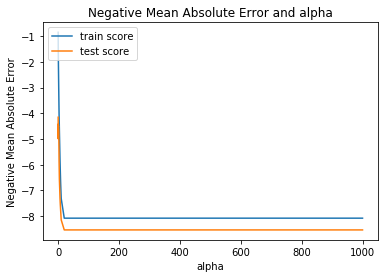

In [43]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
alpha = 10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [64]:
lasso.coef_

array([ 0.       ,  0.       ,  0.       , -0.       ,  0.       ,
        0.       ,  0.5827037,  0.       ,  0.       , -0.       ])